# Visualization Code for *Excitonic Properties of Monolayer Black Phosphorus: Critical Role of Electronic Exchange*


## Table of Content: <a name="TOC"></a>

1. [UV-vis code](#1)

2. [Binding energy](#2)

3. [Sr index and NTO vs Optical gap](#3)



In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.ticker import ScalarFormatter
import pandas as pd

## 1. UV-vis code
<a name="1"></a>[Back to TOC](#TOC)

Here, we use the program `Multiwfn`to read out.log files from different funtional calculations,
and procude the matched `spectrum_curve.txt` and `spectrum_line.txt`. 
- The official website of **Multiwfn**: [http://sobereva.com/multiwfn/](http://sobereva.com/multiwfn/)
- Information about the spectrum is in this zip `UV_vis.tar.gz`

In [4]:
!tar -xzvf UV_vis.tar.gz

x spectrum_curve_B3LYP.txt
x spectrum_curve_BhandLYP.txt
x spectrum_curve_CAMB3LYP.txt
x spectrum_curve_PBE0.txt
x spectrum_curve_PBE0125.txt
x spectrum_curve_wb97.txt
x spectrum_curve_wb97D.txt
x spectrum_line_B3LYP.txt
x spectrum_line_BhandLYP.txt
x spectrum_line_CAMB3LYP.txt
x spectrum_line_PBE0.txt
x spectrum_line_PBE0125.txt
x spectrum_line_wb97.txt
x spectrum_line_wb97D.txt


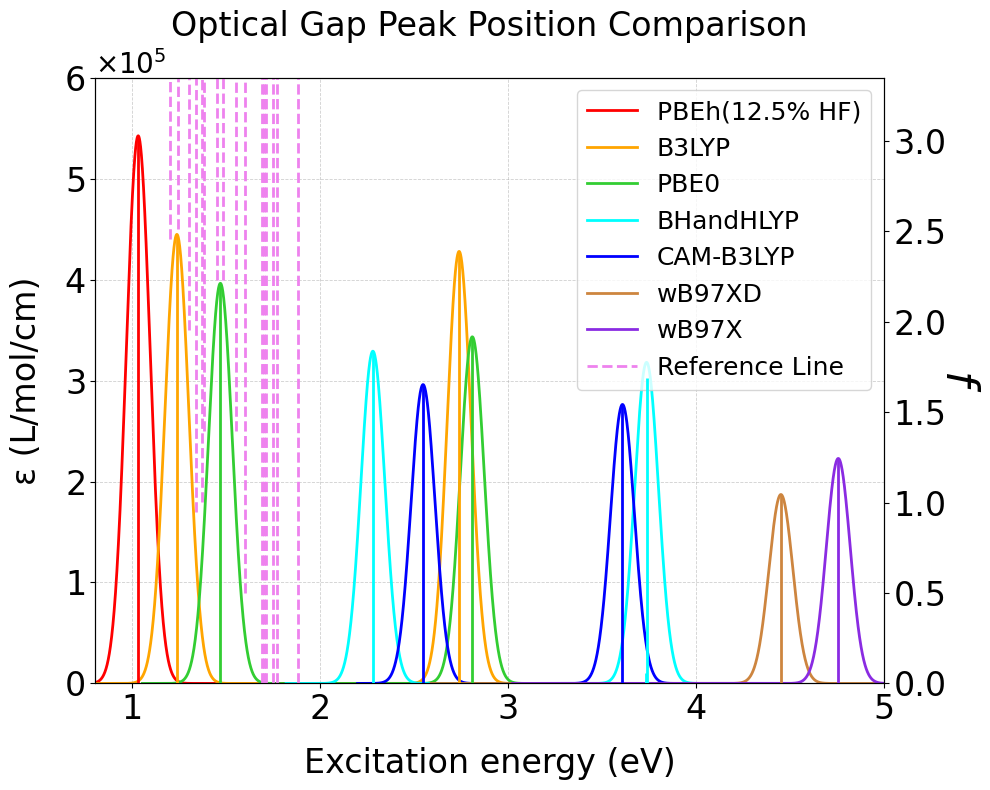

In [5]:
try:
    total_curve_PBE0125 = np.loadtxt('spectrum_curve_PBE0125.txt')
    spectrum_line_PBE0125 = np.loadtxt('spectrum_line_PBE0125.txt')
    total_curve_B3LYP = np.loadtxt('spectrum_curve_B3LYP.txt')
    spectrum_line_B3LYP = np.loadtxt('spectrum_line_B3LYP.txt')
    total_curve_PBE0 = np.loadtxt('spectrum_curve_PBE0.txt')
    spectrum_line_PBE0 = np.loadtxt('spectrum_line_PBE0.txt')
    total_curve_BhandLYP = np.loadtxt('spectrum_curve_BhandLYP.txt')
    spectrum_line_BhandLYP = np.loadtxt('spectrum_line_BhandLYP.txt')
    total_curve_CAMB3LYP = np.loadtxt('spectrum_curve_CAMB3LYP.txt')
    spectrum_line_CAMB3LYP = np.loadtxt('spectrum_line_CAMB3LYP.txt')
    total_curve_wb97D = np.loadtxt('spectrum_curve_wb97D.txt')
    spectrum_line_wb97D = np.loadtxt('spectrum_line_wb97D.txt')
    total_curve_wb97 = np.loadtxt('spectrum_curve_wb97.txt')
    spectrum_line_wb97 = np.loadtxt('spectrum_line_wb97.txt')
except Exception as e:
    print(f"Error reading file: {e}")
    exit()

fig, ax1 = plt.subplots(figsize=(10, 8))

def plot_spectrum(ax, curve, color, label):
    ax.plot(curve[:, 0], curve[:, 1], color=color, label=label, linewidth=2, zorder=2)
    if curve.shape[1] > 2:
        ax.plot(curve[:, 0], curve[:, 2], color=color, linestyle='--', linewidth=2, zorder=2)
    if curve.shape[1] > 3:
        ax.plot(curve[:, 0], curve[:, 3], color=color, linestyle='--', linewidth=2, zorder=2)

plot_spectrum(ax1, total_curve_PBE0125, 'red', 'PBEh(12.5% HF)')
plot_spectrum(ax1, total_curve_B3LYP, 'orange', 'B3LYP')
plot_spectrum(ax1, total_curve_PBE0, 'limegreen', 'PBE0')
plot_spectrum(ax1, total_curve_BhandLYP, 'cyan', 'BHandHLYP')
plot_spectrum(ax1, total_curve_CAMB3LYP, 'blue', 'CAM-B3LYP')
plot_spectrum(ax1, total_curve_wb97D, 'peru', 'wB97XD')
plot_spectrum(ax1, total_curve_wb97, 'blueviolet', 'wB97X')

ax1.set_xlabel('Excitation energy (eV)', fontsize=24, labelpad=15)
ax1.set_xlim([0.8, 5])
ax1.set_ylabel('ε (L/mol/cm)', fontsize=24, labelpad=15)
ax1.set_ylim([0, 600000])

ax1.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax1.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))
ax1.yaxis.get_offset_text().set_fontsize(20)  
ax1.yaxis.get_offset_text().set_y(1.02)

ax1.tick_params(axis='both', which='major', labelsize=24)
ax1.tick_params(axis='both', which='minor', labelsize=24)

ax2 = ax1.twinx()
ax2.set_ylabel(r'$\mathit{f}$', rotation=-90, labelpad=24, fontsize=32)
ax2.set_ylim([0, 3.35])
ax2.tick_params(axis='both', which='major', labelsize=24)
ax2.tick_params(axis='both', which='minor', labelsize=24)

def plot_vlines(ax, data, color):
    ax.vlines(data[:, 0], 0, data[:, 1], color=color, linewidth=2, zorder=3)

plot_vlines(ax2, spectrum_line_PBE0125, 'red')
plot_vlines(ax2, spectrum_line_B3LYP, 'orange')
plot_vlines(ax2, spectrum_line_PBE0, 'limegreen')
plot_vlines(ax2, spectrum_line_BhandLYP, 'cyan')
plot_vlines(ax2, spectrum_line_CAMB3LYP, 'blue')
plot_vlines(ax2, spectrum_line_wb97D, 'peru')
plot_vlines(ax2, spectrum_line_wb97, 'blueviolet')

x_values = [1.20, 1.24, 1.30, 1.34, 1.37, 1.38, 1.45, 1.48, 1.55, 1.60, 1.69, 1.70, 1.75,1.71, 1.77, 1.88]

for x in x_values:
    if x == 1.20:
        ax1.axvline(x=x, color='violet', linestyle='--', linewidth=2, ymin=4.4/6, ymax=1, zorder=3) 
    elif x == 1.24:
        ax1.axvline(x=x, color='violet', linestyle='--', linewidth=2, ymin=4.5/6, ymax=1, zorder=3) 
    elif x == 1.30:
        ax1.axvline(x=x, color='violet', linestyle='--', linewidth=2, ymin=3.5/6, ymax=1, zorder=3)  
    elif x == 1.34:
        ax1.axvline(x=x, color='violet', linestyle='--', linewidth=2, ymin=1.7/6, ymax=1, zorder=3)  
    elif x == 1.37:
        ax1.axvline(x=x, color='violet', linestyle='--', linewidth=2, ymin=1.8/6, ymax=1, zorder=3) 
    elif x == 1.38:
        ax1.axvline(x=x, color='violet', linestyle='--', linewidth=2, ymin=2.5/6, ymax=1, zorder=3)  
    elif x == 1.45:
        ax1.axvline(x=x, color='violet', linestyle='--', linewidth=2, ymin=4.0/6, ymax=1, zorder=3)  
    elif x == 1.48:
        ax1.axvline(x=x, color='violet', linestyle='--', linewidth=2, ymin=4.0/6, ymax=1, zorder=3) 
    elif x == 1.55:
        ax1.axvline(x=x, color='violet', linestyle='--', linewidth=2, ymin=2.5/6, ymax=1, zorder=3) 
    elif x == 1.60:
        ax1.axvline(x=x, color='violet', linestyle='--', linewidth=2, ymin=0.9/6, ymax=1, zorder=3) 
    else:
        ax1.axvline(x=x, color='violet', linestyle='--', linewidth=2, zorder=3) 

ax1.plot([], [], color='violet', linestyle='--', linewidth=2, label='Reference Line')

ax1.legend(loc='upper right', fontsize=18, ncol=1)

plt.title('Optical Gap Peak Position Comparison', fontsize=24, pad=30)
ax1.grid(True, linestyle="--", linewidth=0.6, alpha=0.6)
fig.tight_layout()

plt.savefig('UV_vis_spectrum.png', dpi=900)
plt.show()


## 2. Binding energy
<a name="2"></a>[Back to TOC](#TOC)

### Comparison of Exciton Binding Energies

The following Python code generates a bar chart comparing the **exciton binding energies** calculated using various density functionals and other experimental or computational values(like GW-BSE).

- **Functional results** (e.g., wB97X, PBE0, etc.) are shown in **solid-colored bars**.
- **Other experimental or computational results** are indicated with **violet-colored bars with black borders and hatch marks (`//`)**.


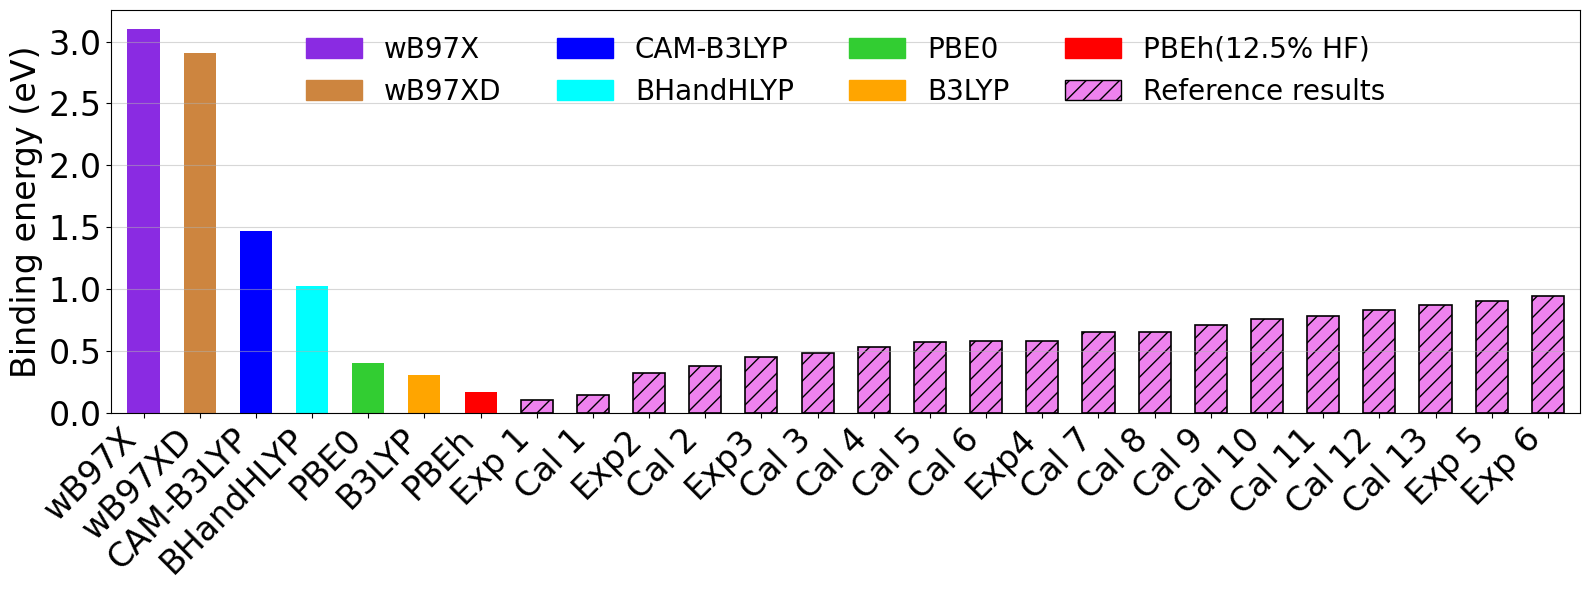

In [3]:
methods = [
    "wB97X", "wB97XD", "CAM-B3LYP", "BHandHLYP",
    "PBE0", "B3LYP", "PBEh", "Exp 1", "Cal 1", "Exp2", "Cal 2", "Exp3", "Cal 3", "Cal 4",
    "Cal 5", "Cal 6", "Exp4", "Cal 7", "Cal 8", "Cal 9", "Cal 10", "Cal 11", "Cal 12", "Cal 13", "Exp 5", "Exp 6"
]
values = [
    3.10, 2.91, 1.47, 1.02, 0.40, 0.30, 0.17, 0.10, 0.14,
    0.32, 0.38, 0.45, 0.48, 0.53, 0.57, 0.58, 0.58,
    0.65, 0.65, 0.71, 0.76, 0.78, 0.83, 0.87, 0.90, 0.94
]

colors = ["blueviolet", "peru", "blue", "cyan", "limegreen", "orange", "red"] + ["violet"] * (len(methods) - 7)

x_pos = np.arange(len(methods)) * 1.4

plt.figure(figsize=(16, 6))
bars = plt.bar(x_pos, values, color=colors, width=0.8)

for bar, method in zip(bars, methods):
    if method.startswith("Cal") or method.startswith("Exp"):
        bar.set_edgecolor("black")
        bar.set_linewidth(1.2)
        bar.set_hatch("//")

plt.xticks(x_pos, methods, fontsize=24, rotation=45, ha='right')

legend_patches = [
    mpatches.Patch(color="blueviolet", label="wB97X"),
    mpatches.Patch(color="peru", label="wB97XD"),
    mpatches.Patch(color="blue", label="CAM-B3LYP"),
    mpatches.Patch(color="cyan", label="BHandHLYP"),
    mpatches.Patch(color="limegreen", label="PBE0"),
    mpatches.Patch(color="orange", label="B3LYP"),
    mpatches.Patch(color="red", label="PBEh(12.5% HF)"),
    mpatches.Patch(facecolor="violet", edgecolor="black", hatch="//", label="Reference results")
]

plt.legend(
    handles=legend_patches,
    fontsize=20,
    ncol=4,
    loc='lower center',
    bbox_to_anchor=(0.5, 0.7),
    frameon=False
)

plt.ylabel("Binding energy (eV)", fontsize=24)
plt.yticks(fontsize=24)

plt.grid(axis='y', linestyle="-", alpha=0.5)

plt.xlim(x_pos[0] - 0.8, x_pos[-1] + 0.8)

plt.tight_layout()

plt.savefig("binding_energy.png", dpi=600)
plt.show()

## 3. Sr index and NTO vs Optical gap
<a name="3"></a>[Back to TOC](#TOC)

- The Sr index and the NTO's contributation can be computed using `Multiwfn`.

### Parallel Calculation Tips

The calculation process in **Multiwfn** can be accelerated by adjusting the number of CPU cores used.

- By default, the program uses **4 cores**.
- You can modify the number of threads by changing the `nthreads` parameter in the **settings file**, based on your laptop's configuration.

> Tip: Setting `nthreads` equal to the number of physical or logical cores on your machine can significantly improve performance.


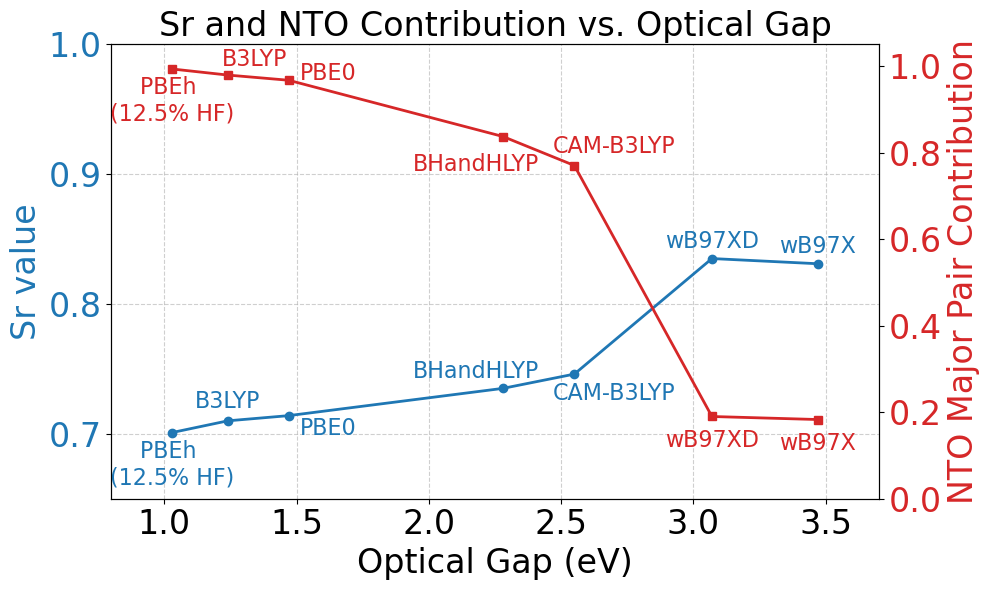

In [8]:
data = {
    "Functional": ["PBEh \n(12.5% HF)", "B3LYP", "PBE0", "BHandHLYP", "CAM-B3LYP", "wB97XD", "wB97X"],
    "Optical Gap (eV)": [1.03, 1.24, 1.47, 2.28, 2.55, 3.07, 3.47],
    "Sr": [0.701, 0.710, 0.714, 0.735, 0.746, 0.835, 0.831],
    "NTO Major Pair Contribution": [0.993, 0.979, 0.967, 0.837, 0.770, 0.190, 0.183]
}

df = pd.DataFrame(data)

fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.set_xlabel('Optical Gap (eV)', fontsize=24)
ax1.set_ylabel('Sr value', color='tab:blue', fontsize=24)

ax1.plot(df["Optical Gap (eV)"], df["Sr"], color='tab:blue', marker='o', linewidth=2, label='Sr')
ax1.tick_params(axis='y', labelcolor='tab:blue', labelsize=24)
ax1.tick_params(axis='x', labelsize=24)
ax1.set_ylim(0.65, 1.00)
ax1.set_xlim(0.8, 3.7)

for i in range(len(df)):
    y_offset = 0.008
    x_offset = 0

    if df["Functional"][i] == "B3LYP":
        y_offset = 0.01  
    elif df["Functional"][i] == "PBE0":
        y_offset = -0.015  
        x_offset = 0.15
    elif df["Functional"][i] == "CAM-B3LYP":
        y_offset = -0.02  
        x_offset = 0.15    
    elif df["Functional"][i] == "BHandHLYP":
        x_offset = -0.1   
    elif df["Functional"][i] == "PBEh \n(12.5% HF)":
        y_offset = -0.04  

    ax1.text(df["Optical Gap (eV)"][i] + x_offset,
             df["Sr"][i] + y_offset,
             df["Functional"][i], fontsize=16, ha='center', color='tab:blue')

ax2 = ax1.twinx()
ax2.set_ylabel('NTO Major Pair Contribution', color='tab:red', fontsize=24)
ax2.plot(df["Optical Gap (eV)"], df["NTO Major Pair Contribution"], color='tab:red',
         marker='s', linewidth=2, label='NTO')
ax2.tick_params(axis='y', labelcolor='tab:red', labelsize=24)
ax2.set_ylim(0, 1.05)

for i in range(len(df)):
    y_offset = -0.05
    x_offset = 0

    if df["Functional"][i] == "B3LYP":
        y_offset = 0.02
        x_offset = 0.1
    elif df["Functional"][i] == "PBE0":
        x_offset = 0.15
        y_offset = 0.0
    elif df["Functional"][i] == "CAM-B3LYP":
        y_offset = 0.028
        x_offset = 0.15
    elif df["Functional"][i] == "BHandHLYP":
        x_offset = -0.1
        y_offset = -0.08
    elif df["Functional"][i] == "PBEh \n(12.5% HF)":
        y_offset = -0.12
    elif df["Functional"][i] == "wB97XD":
        y_offset = -0.07
    elif df["Functional"][i] == "wB97X":
        y_offset = -0.07
    ax2.text(df["Optical Gap (eV)"][i] + x_offset,
             df["NTO Major Pair Contribution"][i] + y_offset,
             df["Functional"][i], fontsize=16, ha='center', color='tab:red')

plt.title("Sr and NTO Contribution vs. Optical Gap", fontsize=24)
ax1.grid(True, linestyle='--', alpha=0.6)

plt.savefig("Sr_NTO_vs_OpticalGap.png", dpi=600, bbox_inches='tight')

plt.tight_layout()
plt.show()